In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
def extract_avg_asr(folder_path):
    asr_values = []
    
    # 遍历每个节点的asr文件
    for node in range(10):
        log_file = os.path.join(folder_path, f"r{node}-tacc-poison-100.log")
        if os.path.exists(log_file):
            with open(log_file, 'r') as file:
                lines = file.readlines()
                # 提取最后一行并转换为float
                last_asr = float(lines[-1].strip())
                asr_values.append(last_asr)
    
    # 计算平均ASR
    avg_asr = np.mean(asr_values) if asr_values else 0
    return avg_asr

In [3]:
def extract_avg_acc(folder_path):
    acc_values = []
    acc_file = os.path.join(folder_path, "test_accuracies.txt")
    
    if os.path.exists(acc_file):
        with open(acc_file, 'r') as file:
            lines = file.readlines()
            # 提取每一行并转换为float
            acc_values = [float(line.strip()) for line in lines]
    
    # 计算平均accuracy
    avg_acc = np.mean(acc_values) if acc_values else 0
    return avg_acc

In [26]:
def process_experiments(base_folder, type='size', num_sizes=12):
    sizes = []
    avg_asrs = []
    avg_accs = []

    # 逐个处理每个size文件夹
    for size in range(0, num_sizes+1):
        folder_path = os.path.join(base_folder, f"DBA-ring-swift-iid-DBA-mnist-trigger-{type}{size}-200/adv3-all")
        if os.path.exists(folder_path):
            avg_asr = extract_avg_asr(folder_path)
            avg_acc = extract_avg_acc(os.path.join(base_folder, f"DBA-ring-swift-iid-DBA-mnist-trigger-{type}{size}-200/"))
            
            sizes.append(size)
            avg_asrs.append(avg_asr)
            avg_accs.append(avg_acc)

    return sizes, avg_asrs, avg_accs

In [40]:
def plot_results(sizes, avg_asrs, avg_accs, type):
    type_to_label = {
        'size': 'Size',
        'location': 'Shift',
        'gap': 'Gap'
    }
    # 绘制avg_asr和avg_acc折线图
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, avg_asrs, label='Average ASR', marker='o')
    plt.plot(sizes, avg_accs, label='Average Accuracy', marker='s')
    
    plt.title(f'Average ASR and Accuracy vs. {type_to_label[type]}')
    plt.xlabel(type_to_label[type])
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

In [19]:
base_folder = "./Output/"

In [41]:
sizes, avg_asrs, avg_accs = process_experiments(base_folder, type='size')

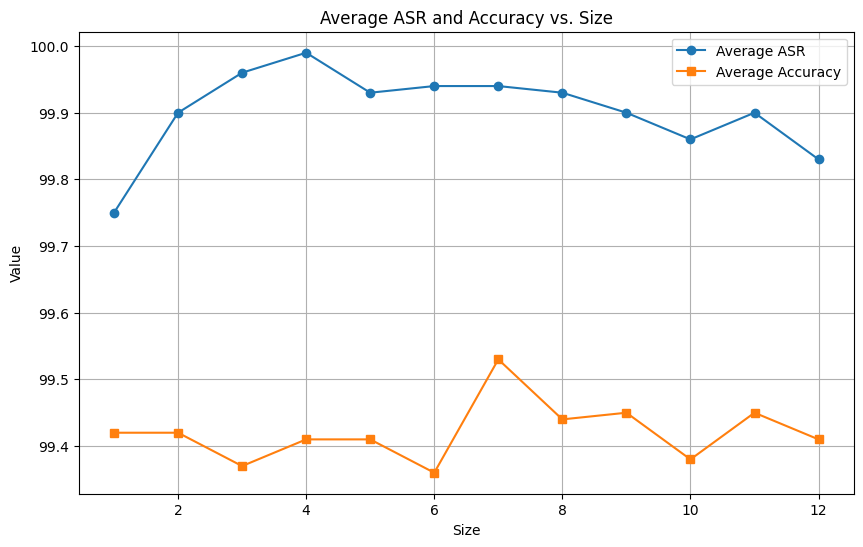

In [42]:
plot_results(sizes, avg_asrs, avg_accs, type='size')

In [43]:
locations, avg_asrs, avg_accs = process_experiments(base_folder, type='location')

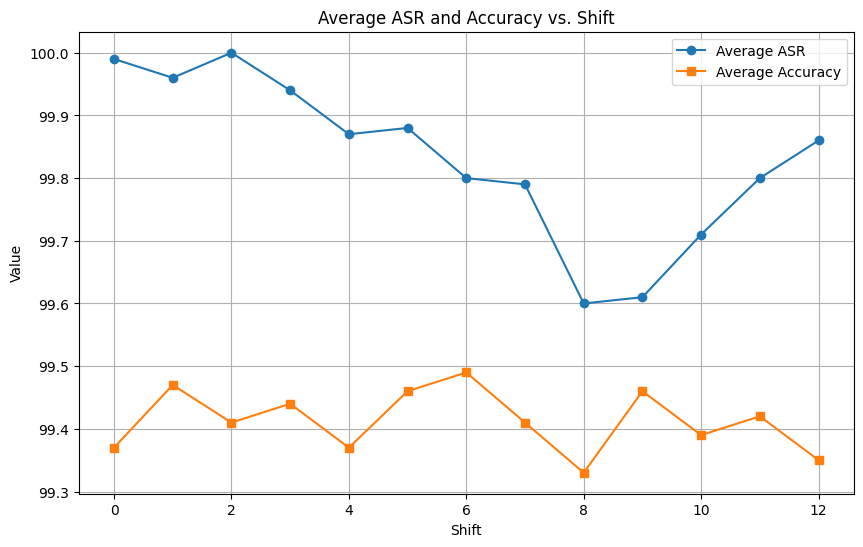

In [44]:
plot_results(locations, avg_asrs, avg_accs, type='location')

In [45]:
gaps, avg_asrs, avg_accs = process_experiments(base_folder, type='gap')

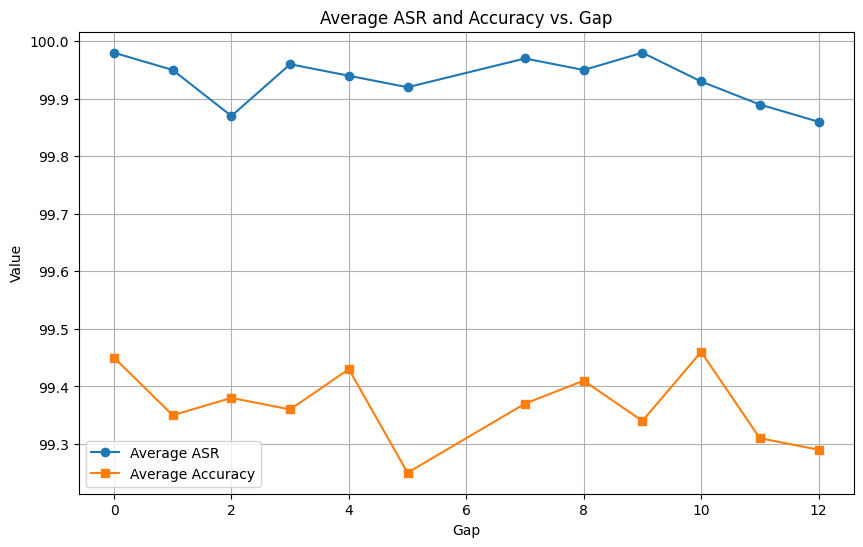

In [46]:
plot_results(gaps, avg_asrs, avg_accs, type='gap')